In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans    #비계층형 군집분석
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = sns.load_dataset("iris")
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


1. data에는 각 꽃의 특성(feature)
2. target_names에는 0 : Setosa 1. Versicolor 2 : Virginica
3. feature_names에는 data의 특성(sepal_length, sepal width, petal length, petal_width)

sepal : 꽃받침  petal : 꽃잎

In [3]:
data.describe()     #iris 수치 데이터 요약

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


iris의 species 열 값을 setosa는 1, 그 외의 값들은 0으로 변환하시오. 

In [4]:
data['species'].apply(lambda x : 1 if x == 'setosa' else 0)
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


groupby로 그룹화 해보기

In [5]:
data.groupby('species').describe().round(2)   #각 species별 특성 값의 통계량

sepal_length                                       sepal_width  \
                  count  mean   std  min   25%  50%  75%  max       count   
species                                                                     
setosa             50.0  5.01  0.35  4.3  4.80  5.0  5.2  5.8        50.0   
versicolor         50.0  5.94  0.52  4.9  5.60  5.9  6.3  7.0        50.0   
virginica          50.0  6.59  0.64  4.9  6.22  6.5  6.9  7.9        50.0   

                  ... petal_length      petal_width                        \
            mean  ...          75%  max       count  mean   std  min  25%   
species           ...                                                       
setosa      3.43  ...         1.58  1.9        50.0  0.25  0.11  0.1  0.2   
versicolor  2.77  ...         4.60  5.1        50.0  1.33  0.20  1.0  1.2   
virginica   2.97  ...         5.88  6.9        50.0  2.03  0.27  1.4  1.8   

                           
            50%  75%  max  
species                    
setosa      0.2  0.3  0.6  
versicolor  1.3  1.5  1.8  
virginica   2.0  2.3  2.5  

[3 rows x 32 columns]

In [6]:
data.loc[data['species'] == 'setosa'].describe().round(2)   #setosa의 기초 통계량

,sepal_length,sepal_width,petal_length,petal_width
count,50.00,50.00,50.00,50.00
mean,5.01,3.43,1.46,0.25
std,0.35,0.38,0.17,0.11
min,4.30,2.30,1.00,0.10
25%,4.80,3.20,1.40,0.20
50%,5.00,3.40,1.50,0.20
75%,5.20,3.68,1.58,0.30
max,5.80,4.40,1.90,0.60


In [7]:
data.loc[data['species'] == 'versicolor'].describe().round(2)    #versicolor의 기초 통계량

,sepal_length,sepal_width,petal_length,petal_width
count,50.00,50.00,50.00,50.00
mean,5.94,2.77,4.26,1.33
std,0.52,0.31,0.47,0.20
min,4.90,2.00,3.00,1.00
25%,5.60,2.52,4.00,1.20
50%,5.90,2.80,4.35,1.30
75%,6.30,3.00,4.60,1.50
max,7.00,3.40,5.10,1.80


In [8]:
data.loc[data['species'] == 'virginica'].describe().round(2)     #virginica의 기초 통계량

,sepal_length,sepal_width,petal_length,petal_width
count,50.00,50.00,50.00,50.00
mean,6.59,2.97,5.55,2.03
std,0.64,0.32,0.55,0.27
min,4.90,2.20,4.50,1.40
25%,6.22,2.80,5.10,1.80
50%,6.50,3.00,5.55,2.00
75%,6.90,3.18,5.88,2.30
max,7.90,3.80,6.90,2.50


seaborn을 이용한 데이터 시각화
1. barplot
2. scatter plot
3. pair plot : 그리드(grid) 형태로 각 데이터 열의 조합에 대해 스캐터 플롯
4. dist plot : 러그와 커널 표시
5. clustermap

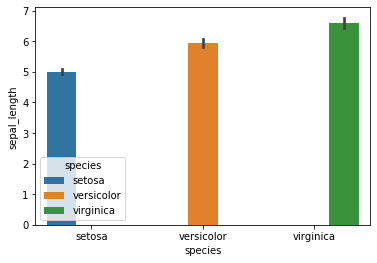

In [9]:
sns.barplot(data = data, hue = "species", x = "species", y = "sepal_length")
plt.show()

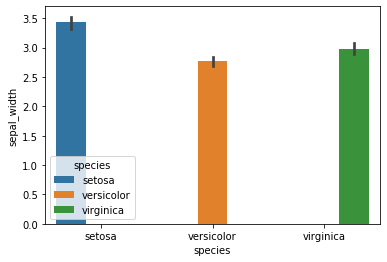

In [10]:
sns.barplot(data = data, hue = "species", x = "species", y = "sepal_width")
plt.show()

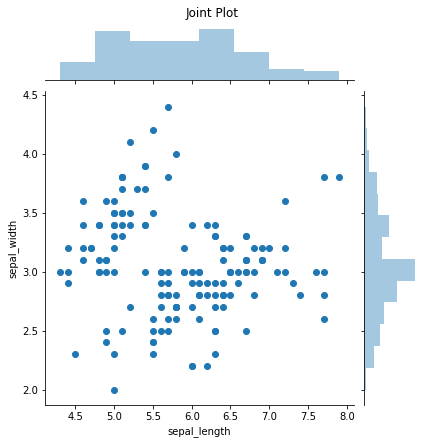

In [11]:
sns.jointplot(x="sepal_length", y="sepal_width", data = data)
plt.suptitle("Joint Plot", y=1.02)
plt.show()

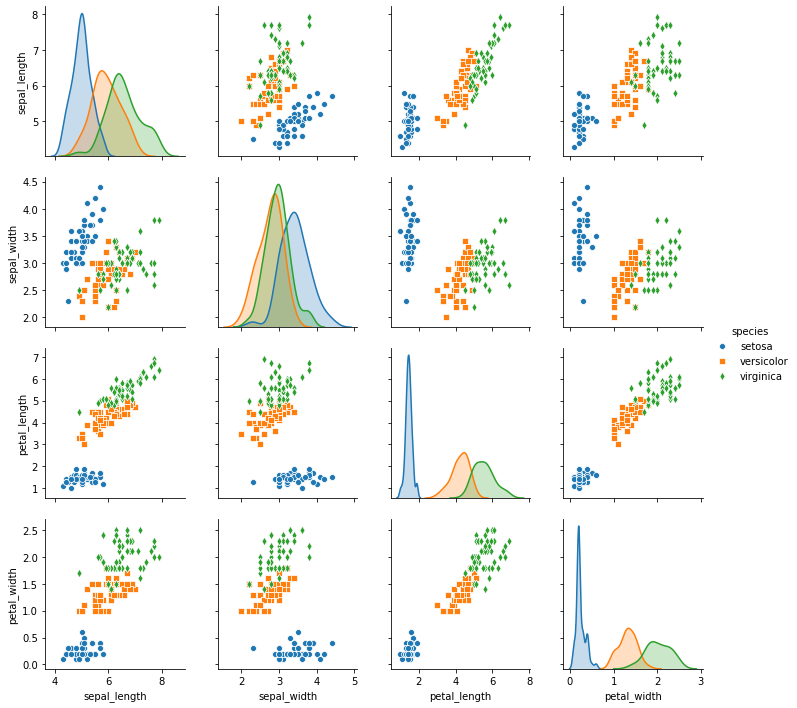

In [12]:
sns.pairplot(data = data, hue = 'species', markers = ['o','s','d'])
plt.show()

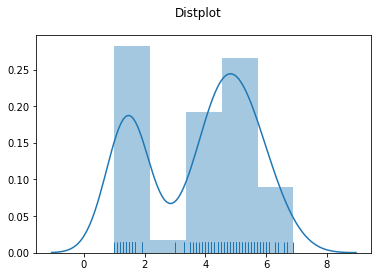

In [13]:
x = data.petal_length.values
sns.distplot(x, kde = True, rug = True)
plt.suptitle("Distplot")
plt.show()

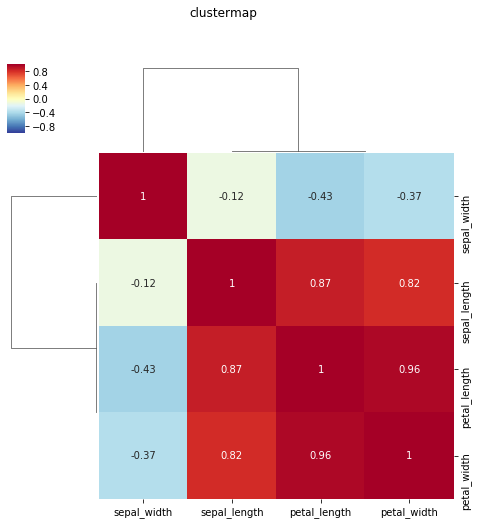

In [14]:
corrmat_un = data.corr()
np.isfinite(corrmat_un)
sns.clustermap(data = corrmat_un, annot = True, cmap = 'RdYlBu_r', vmin = -1, vmax = 1,
              figsize = (8,8), metric = 'correlation')
plt.suptitle("clustermap")
plt.show()

비계층형 군집분석 KMeanns(n_cluster, random_state, algorithm)

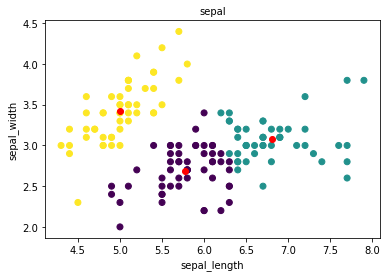

In [15]:
sepal = data[['sepal_length', 'sepal_width']]
model = KMeans(3, random_state = 1000, algorithm = 'elkan')
model.fit(sepal)

pred = model.predict(sepal)
centers = model.cluster_centers_

plt.scatter(x = data['sepal_length'], y = data['sepal_width'], c = pred)
plt.scatter(x = centers[:,0], y = centers[:,1], c = 'r')
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.title("sepal", fontsize=10)
plt.show()

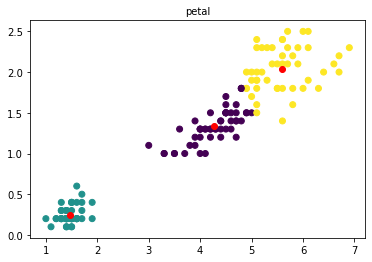

In [16]:
petal = data[['petal_length', 'petal_width']]
model = KMeans(3, random_state=1000, algorithm = 'elkan')

model.fit(petal)
pred = model.predict(petal)
centers = model.cluster_centers_

plt.scatter(x = data['petal_length'], y = data['petal_width'], c = pred)
plt.scatter(x = centers[:,0], y = centers[:,1], marker = 'o', c = 'r')
plt.title("petal", fontsize=10)
plt.show()

In [17]:
kmeans = KMeans(n_clusters=3, random_state=1000).fit(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

iris_fit = pd.concat([data, pd.DataFrame(kmeans.labels_)], axis=1)

iris_fit.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Species', 'KmeansFit']
pd.crosstab(iris_fit.Species, iris_fit.KmeansFit)

KmeansFit,0,1,2
Species,,,
setosa,0,50,0
versicolor,2,0,48
virginica,36,0,14


setosa는 분류가 잘 되었지만 versicolor는 2개가 virginica는 14개가 오분류되었다.

In [18]:
new = KMeans(n_clusters=3, random_state = 1000).fit(data[['petal_length', 'petal_width']])
iris_fit = pd.concat([data, pd.DataFrame(new.labels_)], axis=1)
iris_fit.columns = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Species', 'KmeansFit']
pd.crosstab(iris_fit.Species, iris_fit.KmeansFit)

KmeansFit,0,1,2
Species,,,
setosa,0,50,0
versicolor,48,0,2
virginica,4,0,46


virginica가 4개 오분류로 성능이 좋아졌다.